In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

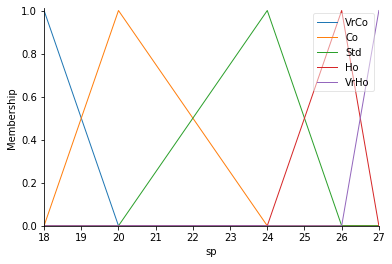

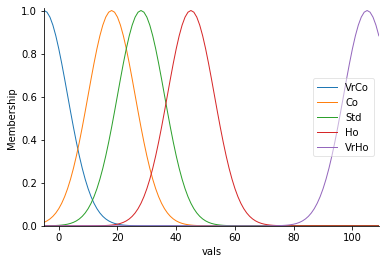

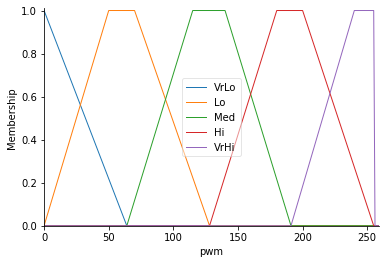

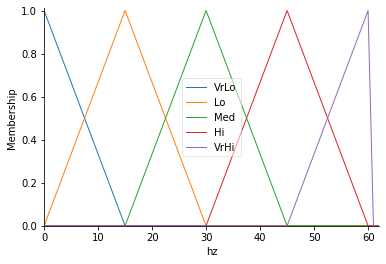

In [ ]:
sp = ctrl.Antecedent(np.arange(18,28,1),'sp')
vals = ctrl.Antecedent(np.arange(-5,110,1),'vals')
pwm = ctrl.Consequent(np.arange(0,260,1),'pwm')
hz = ctrl.Consequent(np.arange(0,63,1),'hz')

sp['VrCo']= fuzz.trimf(sp.universe,[18,18,20])
sp['Co']= fuzz.trimf(sp.universe,[18,20,24])
sp['Std']= fuzz.trimf(sp.universe,[20,24,26])
sp['Ho']= fuzz.trimf(sp.universe,[24,26,27])
sp['VrHo']= fuzz.trimf(sp.universe,[26,27,27])

vals['VrCo']= fuzz.gaussmf(vals.universe,-5,8)
vals['Co']= fuzz.gaussmf(vals.universe,18,8)
vals['Std']= fuzz.gaussmf(vals.universe,28,8)
vals['Ho']= fuzz.gaussmf(vals.universe,45,8)
vals['VrHo']= fuzz.gaussmf(vals.universe,105,8)

pwm['VrLo']= fuzz.trapmf(pwm.universe,[0,0,0,64])
pwm['Lo']= fuzz.trapmf(pwm.universe,[0,50,70,128])
pwm['Med']= fuzz.trapmf(pwm.universe,[64,115,140,191])
pwm['Hi']= fuzz.trapmf(pwm.universe,[128,180,200,255])
pwm['VrHi']= fuzz.trapmf(pwm.universe,[191,240,255,255])

hz['VrLo']= fuzz.trimf(hz.universe,[0,0,15])
hz['Lo']= fuzz.trimf(hz.universe,[0,15,30])
hz['Med']= fuzz.trimf(hz.universe,[15,30,45])
hz['Hi']= fuzz.trimf(hz.universe,[30,45,60])
hz['VrHi']= fuzz.trimf(hz.universe,[45,60,60])

sp.view()
vals.view()
pwm.view()
hz.view()

In [ ]:
rule_1=ctrl.Rule(sp['VrCo'] & vals['VrCo'], pwm['VrLo'])
rule_2=ctrl.Rule(sp['VrCo'] & vals['Co'], pwm['Lo'])
rule_3=ctrl.Rule(sp['VrCo'] & vals['Std'], pwm['Med'])
rule_4=ctrl.Rule(sp['VrCo'] & vals['Ho'], pwm['VrHi'])
rule_5=ctrl.Rule(sp['VrCo'] & vals['VrHo'], pwm['VrHi'])
rule_6=ctrl.Rule(sp['Co'] & vals['VrCo'], pwm['VrLo'])
rule_7=ctrl.Rule(sp['Co'] & vals['Co'], pwm['VrLo'])
rule_8=ctrl.Rule(sp['Co'] & vals['Std'], pwm['Med'])
rule_9=ctrl.Rule(sp['Co'] & vals['Ho'], pwm['VrHi'])
rule_10=ctrl.Rule(sp['Co'] & vals['VrHo'], pwm['VrHi'])
rule_11=ctrl.Rule(sp['Std'] & vals['VrCo'], pwm['VrLo'])
rule_12=ctrl.Rule(sp['Std'] & vals['Co'], pwm['VrLo'])
rule_13=ctrl.Rule(sp['Std'] & vals['Std'], pwm['Med'])
rule_14=ctrl.Rule(sp['Std'] & vals['Ho'], pwm['Hi'])
rule_15=ctrl.Rule(sp['Std'] & vals['VrHo'], pwm['VrHi'])
rule_16=ctrl.Rule(vals['Ho'] & vals['VrCo'], pwm['VrLo'])
rule_17=ctrl.Rule(vals['Ho'] & vals['Co'], pwm['VrLo'])
rule_18=ctrl.Rule(vals['Ho'] & vals['Std'], pwm['Lo'])
rule_19=ctrl.Rule(vals['Ho'] & vals['Ho'], pwm['Hi'])
rule_20=ctrl.Rule(vals['Ho'] & vals['VrHo'], pwm['VrHi'])
rule_21=ctrl.Rule(vals['VrHo'] & vals['VrCo'], pwm['VrLo'])
rule_22=ctrl.Rule(vals['VrHo'] & vals['Co'], pwm['VrLo'])
rule_23=ctrl.Rule(vals['VrHo'] & vals['Std'], pwm['Lo'])
rule_24=ctrl.Rule(vals['VrHo'] & vals['Ho'], pwm['Hi'])
rule_25=ctrl.Rule(vals['VrHo'] & vals['VrHo'], pwm['VrHi'])

Mòi bạn nhập
Nhiệt độ cần (18->27): 26
Nhiệt độ phòng (-5->105): 0
PWM: 127.49999813352666


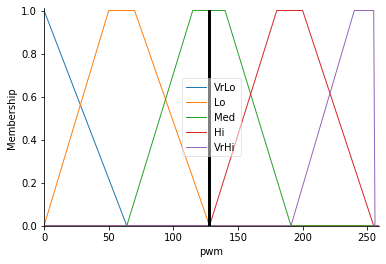

In [ ]:
pwmm_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
pwmm = ctrl.ControlSystemSimulation(pwmm_ctrl)
print('Mòi bạn nhập')
a = float(input("Nhiệt độ cần (18->27): "))
b = float(input("Nhiệt độ phòng (-5->105): "))
pwmm.input['sp'] = a
pwmm.input['vals'] = b
pwmm.compute()
print("PWM:",pwmm.output['pwm'])
pwm.view(sim=pwmm)